# **Lung Cancer Classification using Computerized Tomography (CT) Data**  
<div style="text-align: center;">
    <img src="images/portrait.png" alt="CT Lung Image" style="width:100%; height:50%;">
</div>


## **Abstract**
Lung cancer remains one of the leading causes of cancer-related deaths worldwide, primarily due to late-stage diagnoses. Early detection through imaging technologies like Computerized Tomography (CT) scans has been shown to significantly improve patient outcomes. The objective of this notebook is to develop an efficient classification system to predict the condition of patients by analyzing CT scan data, thereby facilitating early detection of lung cancer.

To achieve this, we utilize a combination of traditional Machine Learning techniques alongside advanced Deep Learning algorithms, with a particular focus on Convolutional Neural Networks (CNNs) due to their effectiveness in image analysis. Furthermore, Computer Vision techniques are applied to optimize image pre-processing and feature extraction, ensuring the robustness and accuracy of the model.


## **Introduction**

### Context of the Problem
Lung cancer is one of the deadliest types of cancer, responsible for millions of deaths globally each year. The prognosis for patients with lung cancer greatly depends on the stage at which the disease is detected. Unfortunately, most lung cancer cases are diagnosed at an advanced stage, limiting treatment options and reducing survival rates. Early detection is crucial in improving patient outcomes, as it allows for timely interventions and a broader range of treatment strategies.

Computerized Tomography (CT) scans play a key role in lung cancer diagnosis. CT imaging provides detailed, cross-sectional views of the lungs, allowing physicians to detect abnormalities such as tumors, nodules, or tissue damage. However, the manual analysis of CT images is time-consuming, subject to human error, and dependent on the expertise of the radiologist. Therefore, automating the classification of lung cancer from CT images using Machine Learning (ML) and Deep Learning (DL) offers significant potential to enhance diagnostic accuracy and efficiency.

### Objective of the Work
This notebook aims to build a robust classification model for detecting lung cancer based on CT scan images. By leveraging techniques from both Machine Learning and Deep Learning, particularly statistical models, we aim to automatically classify CT images as cancerous or non-cancerous. The primary goal is to provide an automated, reliable, and scalable solution to aid in the early detection of lung cancer, thereby improving patient prognosis.

### Structure of the Work
This notebook is structured as follows:

- Data Exploration and Preprocessing: We begin by exploring the dataset, including a detailed visualization of the CT images to gain insights into the structure and distribution of the data. The preprocessing phase involves essential Computer Vision steps such as image normalization to standardize pixel intensity values and segmentation to isolate regions of interest (e.g., lung nodules), which are critical for enhancing model performance and improving feature extraction. Additionally, we apply semi-supervised learning techniques to refine the dataset, leveraging unlabeled/uncertain data to improve the overall quality and representativeness of the training set.

- Model Development: Next, we build and train various classification models(traditional ML algorithms) comparing their performance across different metrics.

- Evaluation and Results: The performance of the models will be assessed using key metrics such as accuracy, precision, recall, and the AUC-ROC curve. Once the best-performing model is identified, we apply hyperparameter tuning techniques to further optimize its performance and maximize its predictive effectiveness.

- Discussion and Future Work: Finally, we will discuss the results, highlighting the strengths and limitations of our approach, and propose potential improvements or future research directions for lung cancer classification using medical imaging.

## **Exploratory Data Analysis(EDA)**
To enhance data visualization and exploration, a custom classes will be developed. This class will implement methods for nodule visualization, querying, and radiomics extraction, which will facilitate subsequent analysis and research.

*Disclaimer: Certain functions in the PyLIDC library, which rely on external packages such as **Numpy, Scikit-learn, and Matplotlib**, among others, have been slightly modified to address compatibility issues arising from deprecated versions.*


In [9]:
import pylidc as pl
import numpy as np
import matplotlib.pyplot as plt
from radiomics.featureextractor import *
import medpy
from sklearn.cluster import KMeans
import matplotlib.animation as manim
from skimage.measure import find_contours
from pylidc.utils import consensus
from Nodule import LIDCBase, PyLIDC

The **LIDC-IDRI** dataset consists of over 1,000 thoracic CT scans from patients, with a primary focus on detecting and analyzing lung nodules. A unique feature of this dataset is the detailed nodule annotations provided by four experienced thoracic radiologists. Each radiologist independently marked and classified nodules, allowing for up to four distinct annotations per nodule. Only nodules larger than 3 mm were included, as these are clinically significant for lung cancer screening. The annotations capture important information for training machine learning models, such as the nodule’s location, volume, sphericity, texture, and other relevant characteristics.

The *PyLidc* module facilitates the processing of these annotations, which are stored in XML format, and provides tools for visualizing the data, making it easier to extract features and prepare it for model development. Below is a practical example of how this module can be used to process and visualize the data:

In [10]:
l = PyLIDC('LIDC-IDRI-0001') # Lets use patient number 1 for the demonstration
l.get_nodule_count() # Number of nodules shown
l.summary() # Some stats
print("")
print("Accessing first nodule annotations...")
nods = l.get_nodules() # Nodules
anns = nods[0] # First, and in this case unique nodule
anns

Patient ID: LIDC-IDRI-0001
Number of nodules: 1
Loading dicom files ... This may take a moment.
Scan dimensions (voxels): (512, 512, 133)
Pixel spacing (mm): 0.703125
Slice thickness (mm): 2.5

Accessing first nodule annotations...


[Annotation(id=84,scan_id=12),
 Annotation(id=85,scan_id=12),
 Annotation(id=86,scan_id=12),
 Annotation(id=87,scan_id=12)]

As demonstrated above, the first patient's nodule has been annotated by four radiologists, allowing us to visualize 2D and 3D these annotations on a specific CT slice. From these annotations, we can extract valuable data, including nodule characteristics such as size, volume, and sphericity,  essential for further analysis.

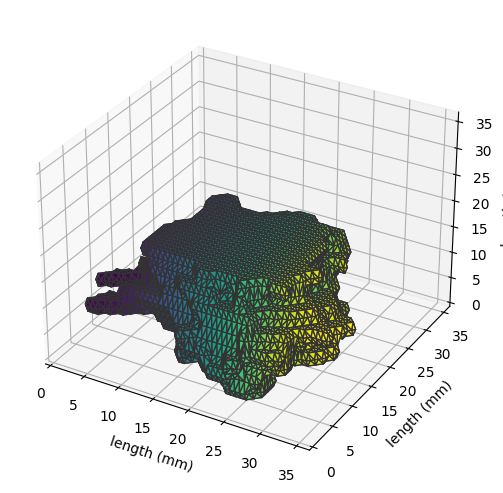

Loading dicom files ... This may take a moment.


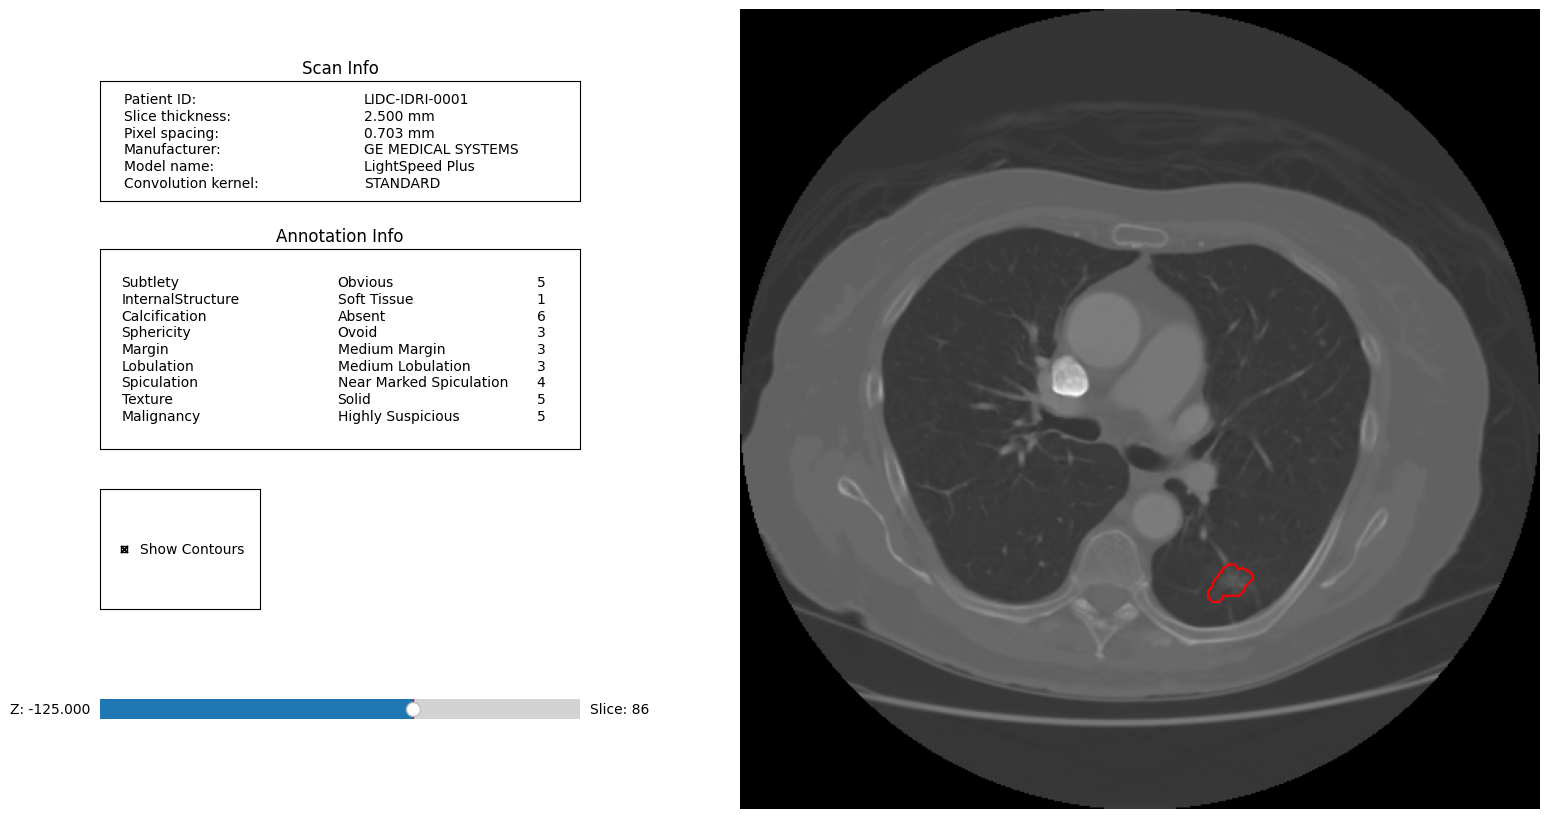

Sphericity: 3.0000
Volume: 7869.37 cubic mm
Surface area: 2801.43 square mm
Average texture score: 5
Calcification: 6


In [15]:
first_annotation = anns[0]
first_annotation.visualize_in_3d()
first_annotation.visualize_in_scan()
# Extract relevant features 
print(f"Sphericity: {first_annotation.sphericity:.4f}")
print(f"Volume: {first_annotation.volume:.2f} cubic mm")
print(f"Surface area: {first_annotation.surface_area:.2f} square mm")
print(f"Average texture score: {first_annotation.texture}")
print(f"Calcification: {first_annotation.calcification}")



This process will be repeated iteratively across the entire dataset to ensure the creation of a comprehensive and reliable dataset. The next step involves analyzing and exploring the patterns and consistency of the annotations provided by the radiologists to better understand their behavior and inter-observer variability.

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

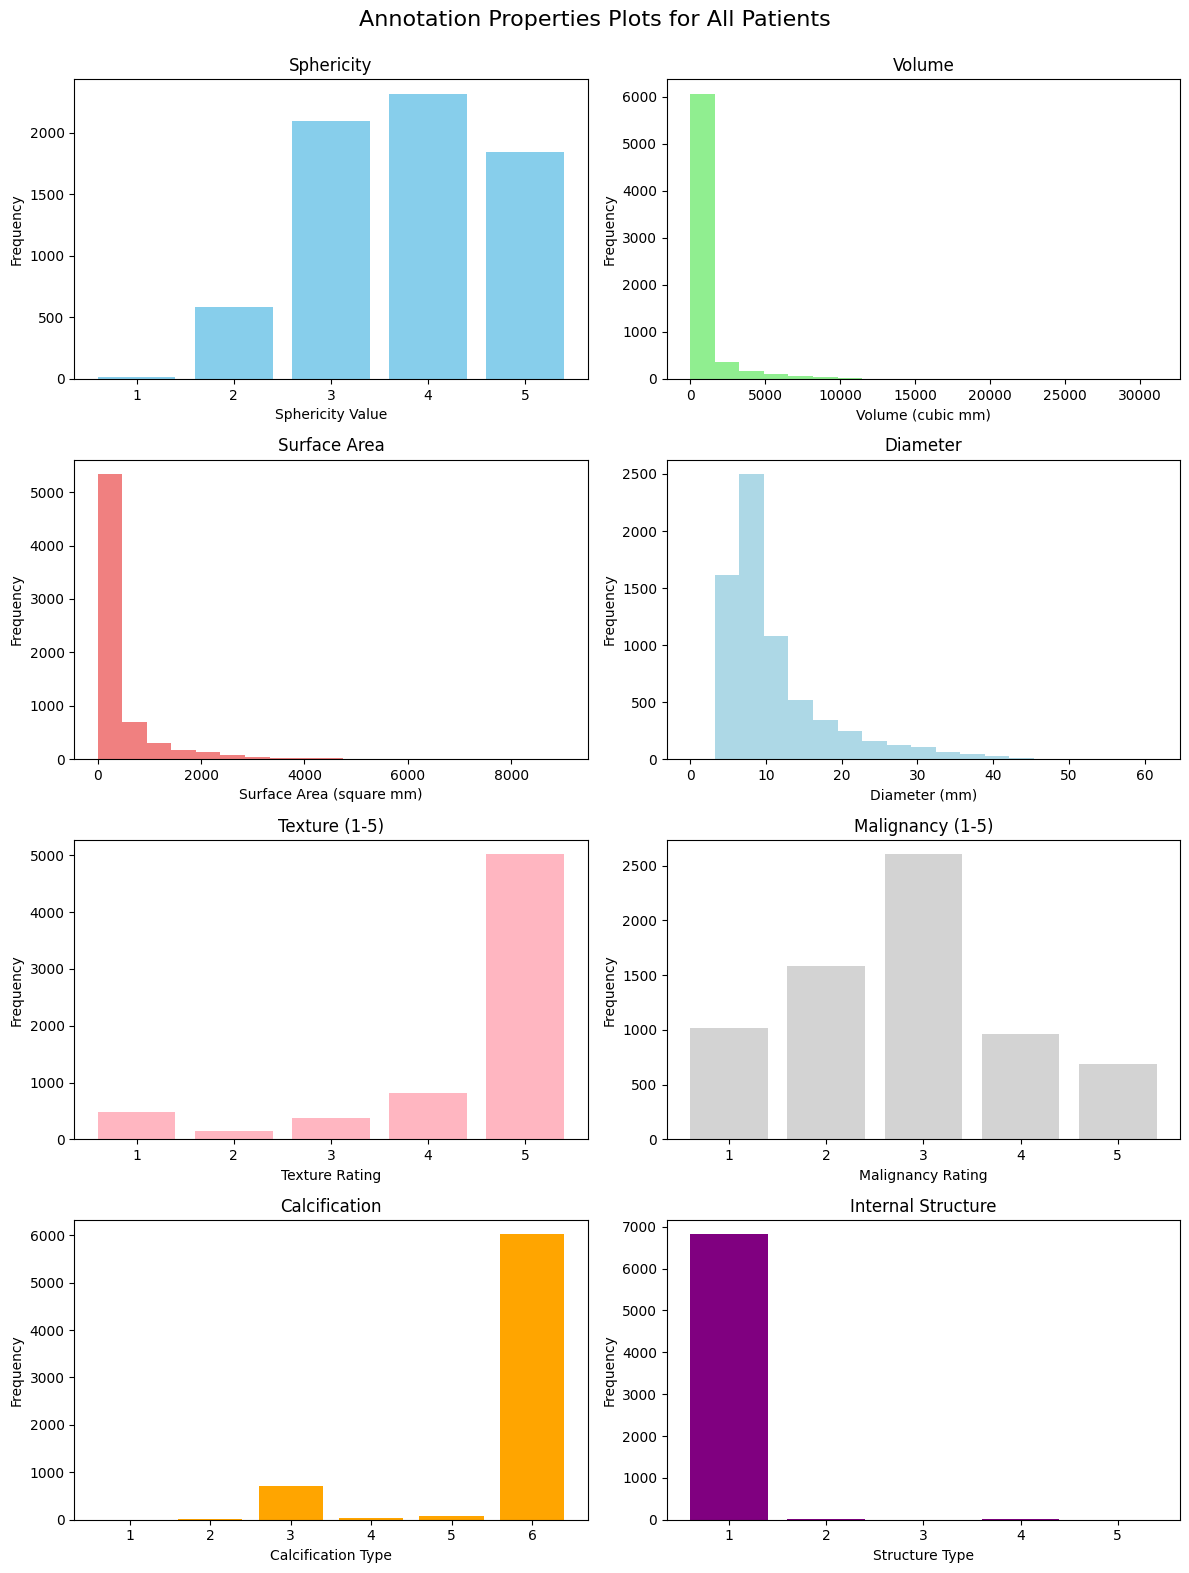

In [6]:
from data_viz import plot_all_patients_annotations

plot_all_patients_annotations()



<div style="text-align: center;">
    <img src="images/anotation_properties.png" alt="Annotation Prop">
</div>


From the graph shown above, we can conclude that the annotations are **not evenly distributed**. If we observe closely, we can see how the surface area, diameter, and volume of the nodules seem to be somewhat related, as all three display a slightly left-skewed graph, especially the diameter.

On the other hand, we can see that the predominant texture of the nodules is solid, but with a soft-tissue internal structure and lacking calcification.

Finally, it is important to note in the Malignancy rating graph that most of the nodule annotations are ambiguous, which often implies that **classifying nodules is not an easy task**, even for professionals in the field.

### **Hounsfield Units(HU)**
Texture plays a crucial role in identifying malignant nodules, as we will further explore below. It can provide significant insight into the internal composition of a nodule, helping differentiate between benign and malignant characteristics. In CT scans, pixel values are represented in Hounsfield Units (HU), which measure the density of tissues. This allows for a more precise analysis of the nodule's texture by distinguishing between soft tissue, calcifications, and other structures based on their specific HU values.
$$HU(x,y) \equiv 1000 \cdot \frac{\mu(x,y) - \mu_{\text{water}}}{\mu_{\text{water}}-\mu_\text{air}}$$

where $\mu$ is the linear attenuation coefficient of the material. The linear attenuation coefficient is defined based on how the intensity of a photon beam decays as it passes a distance $x$ through a material $I=I_0e^{-\mu x}$. Note that $\mu$ depends on the energy of the photon beam, and in a CT scan photons usually have energies $\approx 100$ keV. Here are typical HU values:
<div style="text-align: center;">
    <img src="images/HU_table.jpg" alt="HU Table">
</div>



For this case, we have arbitrarily set the range of **HU (Hounsfield Unit)** values. Specifically, we are using a range from **-1000 to 400**, as this range appears reasonable based on reference tables. It effectively captures key tissue types such as calcifications, fat, fluids, muscles, and even bones, making it potentially useful for detecting malignant nodules. An image example is shown below:

In [1]:
import pydicom
import numpy as np
# Read DICOM file
from pathlib import Path

from utils import convert_to_HU,clip_hu_range,normalize_hu

# Define the directory of the LIDC-IRDI files. For now we will work with just one random CT slice
directory = Path(r"LIDC-IDRI\LIDC-IDRI-0002\1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160200744295382098329")

# Iterate over the files of this directory 
for idx,archive in enumerate(directory.rglob('*')):

    if archive.is_file() and idx<=1: # Ignorar directorys
        # HU conversion from pixels
        hu_image = convert_to_HU(archive)

        # Cap HU units
        clipped_image = clip_hu_range(hu_image)

        # Normalize
        """
        normalized_image = normalize_hu(clipped_image)
        plt.pcolormesh(normalized_image, cmap='gray')
        plt.title("CT Normalized Image")
        plt.show()
        """
        
        

<div style="text-align: center;">
    <img src="images/hu_image_sample.png" alt="HU CT Sample">,<img src="images/hu_image_sample2.png" alt="HU CT Sample2">
</div>

### **Wavelets**
Wavelets are powerful mathematical tools used in signal processing and image analysis. Unlike traditional Fourier transforms, which break down signals into infinite sinusoidal waves, wavelets allow us to decompose signals into small, localized wave-like components. This makes wavelets particularly well-suited for analyzing non-stationary signals or signals that have transient or abrupt changes, such as medical images where detail, texture, and edges are crucial.

There are several families of wavelets, each with different characteristics. In this case, we will use **Haar**, as they are widely used in medical imaging due to their ability to capture both fine and coarse details efficiently, while maintaining low computational requirements. Besides, they have presented the best results empirically.

Daubechies db4 wavelets are computed by first applying low-pass and high-pass filters to the image to separate low-frequency (approximation) and high-frequency (detail) components. These filtered signals are then downsampled (reducing the data size by half), and the process is repeated for the approximation component at multiple scales to capture different levels of detail. This hierarchical decomposition enables multiresolution analysis, making wavelets ideal for complex image processing tasks.

In [9]:
import pywt
import cv2
import matplotlib.pyplot as plt

# Load a grayscale CT scan image (replace 'CT_scan_example.png' with your image path)
image = cv2.imread('lung.png', cv2.IMREAD_GRAYSCALE)
coeffs = pywt.wavedec2(image, 'haar', level=2)

# Extract approximation and detail coefficients 
cA, (cH, cV, cD) = coeffs[0], coeffs[-1]

"""
# Display the approximation and detail components
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(cA, cmap='gray')
plt.title('Approximation Coefficients')

plt.subplot(1, 4, 2)
plt.imshow(cH, cmap='gray')
plt.title('Horizontal Detail Coefficients')

plt.subplot(1, 4, 3)
plt.imshow(cV, cmap='gray')
plt.title('Vertical Detail Coefficients')

plt.subplot(1, 4, 4)
plt.imshow(cD, cmap='gray')
plt.title('Diagonal Detail Coefficients')

plt.show()

"""

'\n# Display the approximation and detail components\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 4, 1)\nplt.imshow(cA, cmap=\'gray\')\nplt.title(\'Approximation Coefficients\')\n\nplt.subplot(1, 4, 2)\nplt.imshow(cH, cmap=\'gray\')\nplt.title(\'Horizontal Detail Coefficients\')\n\nplt.subplot(1, 4, 3)\nplt.imshow(cV, cmap=\'gray\')\nplt.title(\'Vertical Detail Coefficients\')\n\nplt.subplot(1, 4, 4)\nplt.imshow(cD, cmap=\'gray\')\nplt.title(\'Diagonal Detail Coefficients\')\n\nplt.show()\n<div style="text-align: center;">\n    <img src="hu_image_sample.png" alt="HU CT Sample">,<img src="hu_image_sample2.png" alt="HU CT Sample2">\n</div>\n'

<div style="text-align: center;">
    <img src="images/wavelets.png" alt="HaarWavelet">
</div>

Wavelets have a wide range of applications beyond computer vision, including but not limited to feature extraction, segmentation, and noise reduction. They are also employed in fields such as time-series analysis for denoising and in various other applications, including audio processing and data compression. In this particular study, while **wavelets will not be utilized directly in the model** , their implementation could significantly enhance the robustness and performance of trained models. By capturing localized features and managing noise more effectively, wavelet transforms can provide a richer representation of the data, potentially leading to improved classification accuracy and generalization capabilities.

### **Dataset Preparation**
After conducting a thorough analysis of the data, we will proceed with the construction of the dataset, which will serve as the foundation for training machine learning models. Our primary objective is to **predict the benignity of a nodule** based on features annotated by radiologists, as well as characteristics extracted from the images. Examples of features that can be extracted include texture measures, shape descriptors, and statistical metrics such as intensity histograms.

To achieve this, we will utilize statistical summaries of the annotations and the CT slices, primarily focusing on metrics like the mean, which will aid in estimating the location of the nodule. This estimation will be crucial for generating the corresponding mask and for determining its associated features.

In [40]:
from pathlib import Path  # Asegúrate de importar Path
from utils import  segment_lung,calculate_malignancy
import seaborn as sns


pid = "LIDC-IDRI-0001" #LIDC-IDRI-0001~
scan = pl.query(pl.Scan).all()
nodules_annotation = scan.cluster_annotations()
vol = scan.to_volume()
print("Patient ID: {} Dicom Shape: {} Number of Annotated Nodules: {}".format(pid,vol.shape,len(nodules_annotation)))

# This is to name each image and mask
prefix = [str(x).zfill(3) for x in range(1000)]

IMAGE_DIR = Path("data/image")
MASK_DIR = Path("data/mask")

patient_image_dir = IMAGE_DIR / pid
patient_mask_dir = MASK_DIR / pid
Path(patient_image_dir).mkdir(parents=True, exist_ok=True)
Path(patient_mask_dir).mkdir(parents=True, exist_ok=True)

if len(nodules_annotation) > 0:
    # Patients with nodules
    for nodule_idx, nodule in enumerate(nodules_annotation):
    # Call nodule images. Each Patient will have at maximum 4 annotations as there are only 4 doctors
    # This current for loop iterates over total number of nodules in a single patient
        mask, cbbox, masks = consensus(nodule,0.5,512) # Perform a consensus consolidation and 50% agreement level.
        lung_np_array = vol[cbbox]
   
        # We calculate the malignancy information
        malignancy, cancer_label = calculate_malignancy(nodule)

        for nodule_slice in range(mask.shape[2]):
            # This second for loop iterates over each single nodule.
            # There are some mask sizes that are too small. These may hinder training.
            if np.sum(mask[:,:,nodule_slice]) <= 8: # MASK_THRESHOLD = 8 discovered and tried and empirically.
                #print("Not over mask_threshold...")
                continue
            # Segment Lung part only
            lung_segmented_np_array = segment_lung(lung_np_array[:,:,nodule_slice])
            # I am not sure why but some values are stored as -0. <- this may result in datatype error in pytorch training # Not sure
            lung_segmented_np_array[lung_segmented_np_array==-0] =0
            # This itereates through the slices of a single nodule
            # Naming of each file: NI= Nodule Image, MA= Mask Original
            nodule_name = "{}_NI{}_slice{}".format(pid[-4:],prefix[nodule_idx],prefix[nodule_slice])
            mask_name = "{}_MA{}_slice{}".format(pid[-4:],prefix[nodule_idx],prefix[nodule_slice])
            meta_list = [pid[-4:],nodule_idx,prefix[nodule_slice],nodule_name,mask_name,malignancy,cancer_label,False]

            np.save(patient_image_dir / nodule_name,lung_segmented_np_array)
            np.save(patient_mask_dir / mask_name,mask[:,:,nodule_slice])
        

Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0001 Dicom Shape: (512, 512, 133) Number of Annotated Nodules: 1


C:\Users\Alejandro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alejandro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alejandro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

Forma del arreglo: (512, 512)


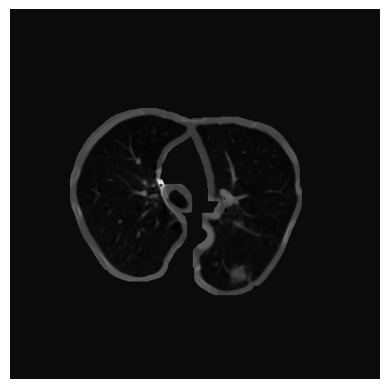

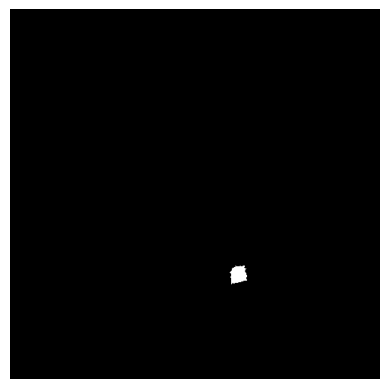

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npy
file_path = r"data\image\LIDC-IDRI-0001\0001_NI000_slice093.npy" # Reemplaza con la ruta a tu archivo
data = np.load(file_path)

# Cargar el archivo .npy
file_path2 = r"data\mask\LIDC-IDRI-0001\0001_MA000_slice093.npy" # Reemplaza con la ruta a tu archivo
data2 = np.load(file_path2)

# Imprimir la forma del arreglo
print("Forma del arreglo:", data.shape)

# Visualizar datos (si es un arreglo 2D o 3D)
if data.ndim == 2:  # Si el arreglo es 2D
    plt.imshow(data, cmap='gray')  # Muestra la imagen en escala de grises
    plt.axis('off')  # Oculta los ejes
    plt.show()

    plt.imshow(data2, cmap='gray')  # Muestra la imagen en escala de grises
    plt.axis('off')  # Oculta los ejes
    plt.show()
elif data.ndim == 3:  # Si el arreglo es 3D
    # Suponiendo que queremos mostrar el primer "slice" del arreglo 3D
    plt.imshow(data[:, :, 0], cmap='gray')  # Muestra el primer slice en escala de grises
    plt.axis('off')  # Oculta los ejes
    plt.show()
else:
    print("El arreglo no es 2D ni 3D. Forma:", data.shape)


In [55]:




pid = "LIDC-IDRI-0001"  # Identificador del paciente
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()  # Obtén el escaneo del paciente
nodules_annotation = scan.cluster_annotations()  # Obtén las anotaciones de los nódulos
vol = scan.to_volume()  # Convierte el escaneo a un volumen numpy
print("Patient ID: {} Dicom Shape: {} Number of Annotated Nodules: {}".format(pid, vol.shape, len(nodules_annotation)))

# Para nombrar cada imagen y máscara
prefix = [str(x).zfill(3) for x in range(1000)]

IMAGE_DIR = Path("data/image")
MASK_DIR = Path("data/mask")

# Crear los directorios para almacenar imágenes y máscaras
patient_image_dir = IMAGE_DIR / pid
patient_mask_dir = MASK_DIR / pid
Path(patient_image_dir).mkdir(parents=True, exist_ok=True)
Path(patient_mask_dir).mkdir(parents=True, exist_ok=True)

if len(nodules_annotation) > 0:
    # Pacientes con nódulos
    for nodule_idx, nodule in enumerate(nodules_annotation):
        # Llamada a las imágenes de nódulos. Cada paciente tiene un máximo de 4 anotaciones (4 doctores).
        # Este bucle itera sobre el número total de nódulos en un paciente.
        mask, cbbox, masks = consensus(nodule, 0.5, 512)  # Realiza una consolidación del consenso (acuerdo del 50%).
        lung_np_array = vol[cbbox]  # Extrae el volumen del área con el nódulo

        # Calculamos la información de malignidad
        malignancy, cancer_label = calculate_malignancy(nodule)

        for nodule_slice in range(mask.shape[2]):
            # Este segundo bucle itera sobre cada slice del nódulo.
            # Filtramos los tamaños de máscara pequeños que pueden interferir en el entrenamiento.
            if np.sum(mask[:, :, nodule_slice]) <= 8:  # MASK_THRESHOLD = 8 (descubierto y probado empíricamente).
                continue

            # En lugar de segmentar, simplemente obtenemos el slice original del volumen
            lung_original_slice = lung_np_array[:, :, nodule_slice]
            
            # Verificamos y corregimos valores que puedan causar errores de tipo de datos
            lung_original_slice[lung_original_slice == -0] = 0

            # Nombramos cada archivo: NI = Nodule Image, MA = Mask Original
            nodule_name = "{}_NI{}_slice{}".format(pid[-4:], prefix[nodule_idx], prefix[nodule_slice])
            mask_name = "{}_MA{}_slice{}".format(pid[-4:], prefix[nodule_idx], prefix[nodule_slice])
            meta_list = [pid[-4:], nodule_idx, prefix[nodule_slice], nodule_name, mask_name, malignancy, cancer_label, False]

            # Guardamos la imagen original y la máscara
            np.save(patient_image_dir / nodule_name, lung_original_slice)
            np.save(patient_mask_dir / mask_name, mask[:, :, nodule_slice])


Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0001 Dicom Shape: (512, 512, 133) Number of Annotated Nodules: 1


NameError: name 'median_high' is not defined

Forma del arreglo: (512, 512)


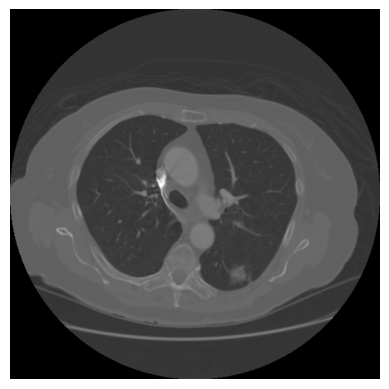

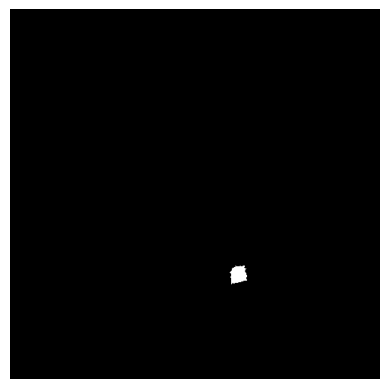

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npy
file_path = r"data\image\LIDC-IDRI-0001\0001_NI000_slice093.npy" # Reemplaza con la ruta a tu archivo
data = np.load(file_path)

# Cargar el archivo .npy
file_path2 = r"data\mask\LIDC-IDRI-0001\0001_MA000_slice093.npy" # Reemplaza con la ruta a tu archivo
data2 = np.load(file_path2)

# Imprimir la forma del arreglo
print("Forma del arreglo:", data.shape)

# Visualizar datos (si es un arreglo 2D o 3D)
if data.ndim == 2:  # Si el arreglo es 2D
    plt.imshow(data, cmap='gray')  # Muestra la imagen en escala de grises
    plt.axis('off')  # Oculta los ejes
    plt.show()

    plt.imshow(data2, cmap='gray')  # Muestra la imagen en escala de grises
    plt.axis('off')  # Oculta los ejes
    plt.show()
elif data.ndim == 3:  # Si el arreglo es 3D
    # Suponiendo que queremos mostrar el primer "slice" del arreglo 3D
    plt.imshow(data[:, :, 0], cmap='gray')  # Muestra el primer slice en escala de grises
    plt.axis('off')  # Oculta los ejes
    plt.show()
else:
    print("El arreglo no es 2D ni 3D. Forma:", data.shape)


In [39]:
data2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [45]:
import numpy as np
import SimpleITK as sitk



def numpy_to_sitk(np_array):
    """
    Convierte un arreglo NumPy en un objeto SimpleITK.Image.
    """
    return sitk.GetImageFromArray(np_array)

def extract_radiomics(scan_array, mask_array):
    """
    Extract radiomic features for a specific nodule using pyradiomics.
    Returns:
    Dictionary of radiomic features.
    """
    # Convertir los arrays NumPy a objetos SimpleITK
    scan_sitk = numpy_to_sitk(scan_array)

    # Convertir la máscara booleana (True/False) a una máscara entera (1/0)
    mask_array_int = mask_array.astype(np.uint8)
    mask_sitk = numpy_to_sitk(mask_array_int)

    # Configurar el extractor de radiomics
    extractor = RadiomicsFeatureExtractor()

    # Extraer las características
    features = extractor.execute(scan_sitk, mask_sitk)

    return features

# Cargar el archivo .npy del escaneo
file_path = r"data\image\LIDC-IDRI-0001\0001_NI000_slice093.npy"
data = np.load(file_path)

# Cargar el archivo .npy de la máscara (booleana)
file_path2 = r"data\mask\LIDC-IDRI-0001\0001_MA000_slice093.npy"
data2 = np.load(file_path2)

# Extraer características radiómicas
f = extract_radiomics(data, data2)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


INICIO

In [49]:
for key,val in f.items():
    print(key,val)

diagnostics_Versions_PyRadiomics v3.1.0
diagnostics_Versions_Numpy 1.24.4
diagnostics_Versions_SimpleITK 2.4.0
diagnostics_Versions_PyWavelet 1.4.1
diagnostics_Versions_Python 3.8.10
diagnostics_Configuration_Settings {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes {'Original': {}}
diagnostics_Image-original_Hash 92ec72b8bdba4bbef119eeb30821cd83be1fc509
diagnostics_Image-original_Dimensionality 2D
diagnostics_Image-original_Spacing (1.0, 1.0)
diagnostics_Image-original_Size (512, 512)
diagnostics_Image-original_Mean -858.62744140625
diagnostics_Image-original_Minimum -2048.0
diagnostics_Image-original_Maximum 3071.0
diagnostics_Mask-original_Hash 5fb397c64e4358e

In [16]:
f

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.1.0'),
             ('diagnostics_Versions_Numpy', '1.24.4'),
             ('diagnostics_Versions_SimpleITK', '2.4.0'),
             ('diagnostics_Versions_PyWavelet', '1.4.1'),
             ('diagnostics_Versions_Python', '3.8.10'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True}),
             ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}),
             ('diagn

In [17]:
import pylidc as pl
import os

DICOM_DIR = r"LIDC-IDRI"
IDRI_list = [f for f in os.listdir(DICOM_DIR) if not f.startswith('.')]
print(f"There are {len(IDRI_list)} patients")

pid = 'LIDC-IDRI-0078'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

There are 1010 patients


In [18]:
a = scan.cluster_annotations()[0][0]

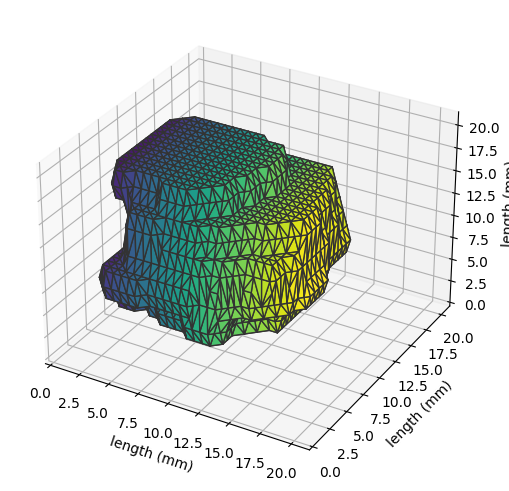

In [19]:
a.visualize_in_3d(cmap='viridis')

In [15]:

for patient in IDRI_list:
    pid = patient  # LIDC-IDRI-0001~
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
    nodules_annotation = scan.cluster_annotations()
    vol = scan.to_volume()
    print("Patient ID: {} Dicom Shape: {} Number of Annotated Nodules: {}".format(pid, vol.shape, len(nodules_annotation)))


Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0001 Dicom Shape: (512, 512, 133) Number of Annotated Nodules: 1
Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0002 Dicom Shape: (512, 512, 261) Number of Annotated Nodules: 1
Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0003 Dicom Shape: (512, 512, 140) Number of Annotated Nodules: 4
Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0004 Dicom Shape: (512, 512, 241) Number of Annotated Nodules: 1
Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0005 Dicom Shape: (512, 512, 133) Number of Annotated Nodules: 3
Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0006 Dicom Shape: (512, 512, 133) Number of Annotated Nodules: 4
Loading dicom files ... This may take a moment.
Patient ID: LIDC-IDRI-0007 Dicom Shape: (512, 512, 145) Number of Annotated Nodules: 2
Loading dicom files ... This may take a moment.
Patient

KeyboardInterrupt: 

In [18]:
for nodule_idx, nodule in enumerate(nodules_annotation):
    print(nodule)
    mask, cbbox, masks = consensus(nodule,0.5,512)
    lung_np_array = vol[cbbox]
    print(lung_np_array)

[Annotation(id=136,scan_id=20)]
[[[-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  ...
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]]

 [[-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  ...
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]]

 [[-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  ...
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]]

 ...

 [[-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  [-2048 -2048 -2048 ... -2048 -2048 -2048]
  ...
  [-2048

Loading dicom files ... This may take a moment.


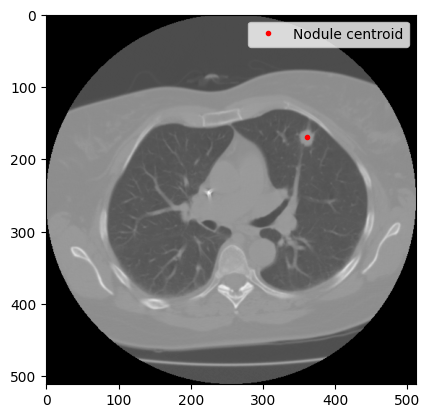

In [2]:
import pylidc as pl
import matplotlib.pyplot as plt

ann = pl.query(pl.Annotation).first()
i,j,k = ann.centroid

vol = ann.scan.to_volume()

plt.imshow(vol[:,:,int(k)], cmap=plt.cm.gray)
plt.plot(j, i, '.r', label="Nodule centroid")
plt.legend()
plt.show()

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.
Loading dicom files ... This may take a moment.
(512, 512, 87)
-702.15, 812.52
Loading dicom files ... This may take a moment.


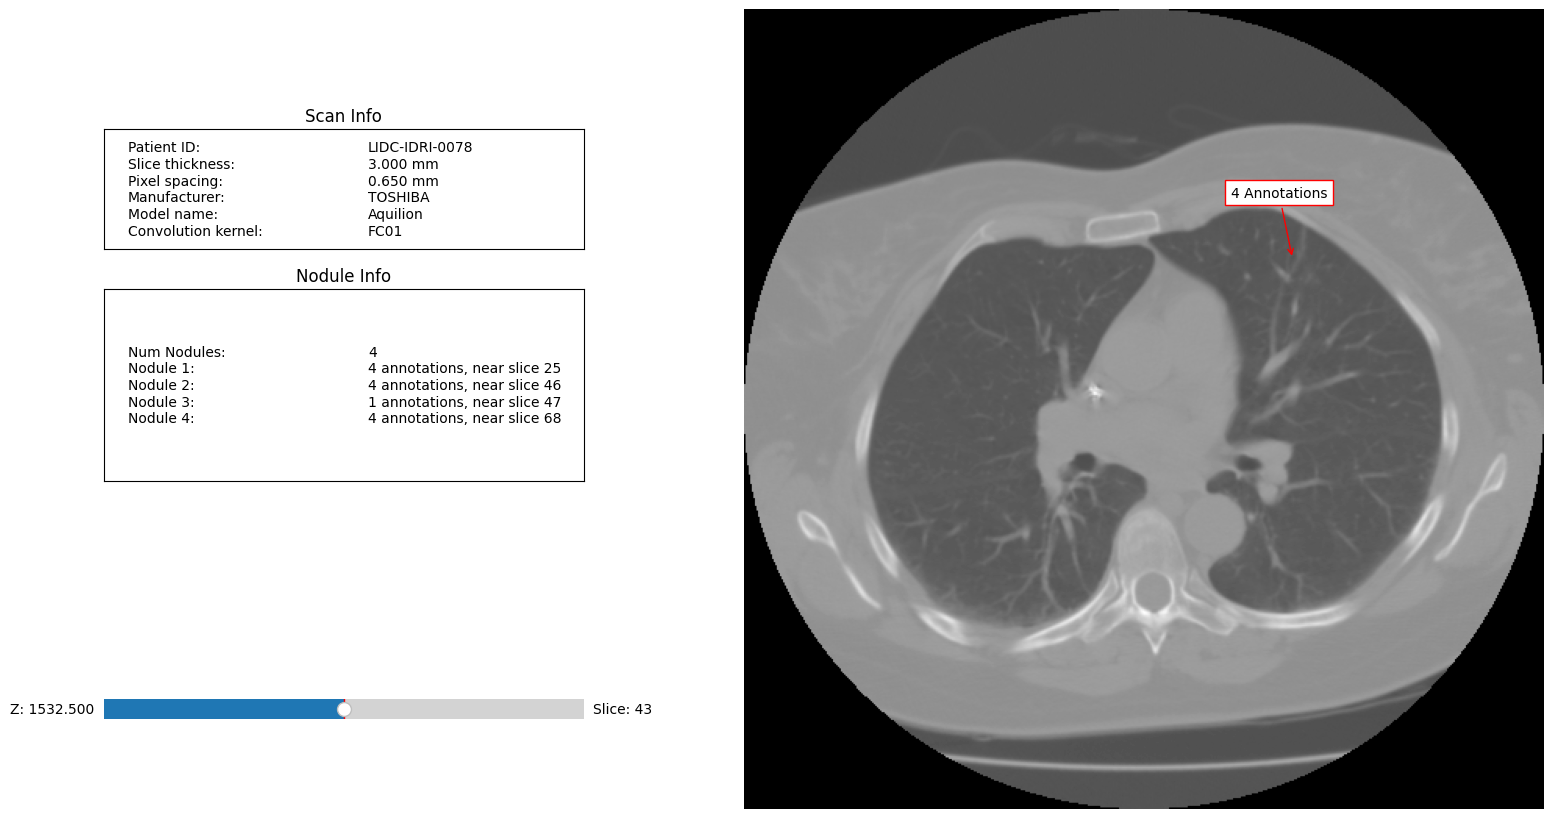

In [13]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))
# => Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))
# => Nodule 1 has 4 annotations.
# => Nodule 2 has 4 annotations.
# => Nodule 3 has 1 annotations.
# => Nodule 4 has 4 annotations.
vol = scan.to_volume()
print(vol.shape)
# => (512, 512, 87)

print("%.2f, %.2f" % (vol.mean(), vol.std()))
# => -702.15, 812.52
scan.visualize(annotation_groups=nods)

In [1]:
import pylidc as pl

# Get the first annotation with spiculation value greater than 3.
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.spiculation > 3).first()

print(ann.spiculation)
# => 4

# Each nodule feature has a corresponding property
# to print the semantic value.
print(ann.Spiculation)
# => Medium-High Spiculation

print("%.2f, %.2f, %.2f" % (ann.diameter,
                            ann.surface_area,
                            ann.volume))

4
Near Marked Spiculation
28.67, 1876.94, 4554.13


In [2]:
import pylidc as pl
import matplotlib.pyplot as plt

ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

mask = ann.boolean_mask()
bbox = ann.bbox()

print("Avg HU inside nodule: %.1f" % vol[bbox][mask].mean())
# => Avg HU inside nodule: -280.0

print("Avg HU outside nodule: %.1f" % vol[bbox][~mask].mean())
# => Avg HU outside nodule: -732.2

Loading dicom files ... This may take a moment.
Avg HU inside nodule: -231.2
Avg HU outside nodule: -718.5


In [8]:
import pylidc as pl

ann = pl.query(pl.Annotation).first()

zvals = ann.contour_slice_zvals
kvals = ann.contour_slice_indices
scan_zvals = ann.scan.slice_zvals

for k,z in zip(kvals, zvals):
    # the two z values should the same (up to machine precision)
    print(k, z, scan_zvals[k])

44 1535.5 1535.5
45 1538.5 1538.5
46 1541.5 1541.5
47 1544.5 1544.5
48 1547.5 1547.5
49 1550.5 1550.5


Loading dicom files ... This may take a moment.


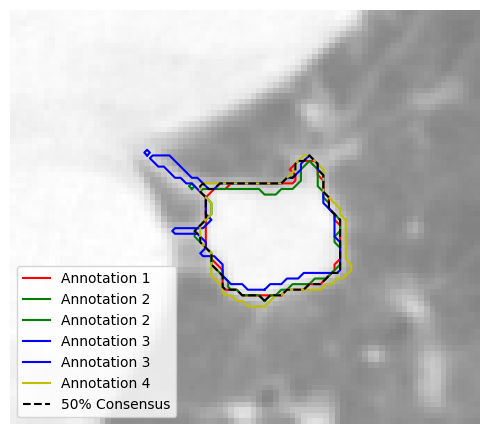

In [9]:



# Query for a scan, and convert it to an array volume.
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0078').first()
vol = scan.to_volume()

# Cluster the annotations for the scan, and grab one.
nods = scan.cluster_annotations()
anns = nods[0]

# Perform a consensus consolidation and 50% agreement level.
# We pad the slices to add context for viewing.
cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

# Get the central slice of the computed bounding box.
k = int(0.5*(cbbox[2].stop - cbbox[2].start))

# Set up the plot.
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

# Plot the annotation contours for the kth slice.
colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
        label = "Annotation %d" % (j+1)
        plt.plot(c[:,1], c[:,0], colors[j], label=label)

# Plot the 50% consensus contour for the kth slice.
for c in find_contours(cmask[:,:,k].astype(float), 0.5):
    plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

ax.axis('off')
ax.legend()
plt.tight_layout()
#plt.savefig("../images/consensus.png", bbox_inches="tight")
plt.show()

In [1]:
import pylidc as pl
import matplotlib.pyplot as plt

import numpy as np

# Inicializamos una lista para almacenar las malignidades de los nódulos
malignidades = []

# Consulta a la base de datos LIDC-IDRI para obtener todos los escaneos
scans = pl.query(pl.Scan).all()

# Recorremos cada escaneo
for scan in scans:
    # Obtenemos los nódulos de cada escaneo
    nodules = scan.cluster_annotations()
    print(scan.id)
    
    # Para cada nódulo, recorremos las anotaciones
    for nodule in nodules:
        # Para cada anotación de un nódulo, extraemos la malignidad
        for annotation in nodule:
            malignidades.append(annotation.malignancy)

# Convertimos las malignidades en un array de numpy
malignidades = np.array(malignidades)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
1

NameError: name 'sns' is not defined

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_19492\2292832535.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=malignidades, palette='Blues')


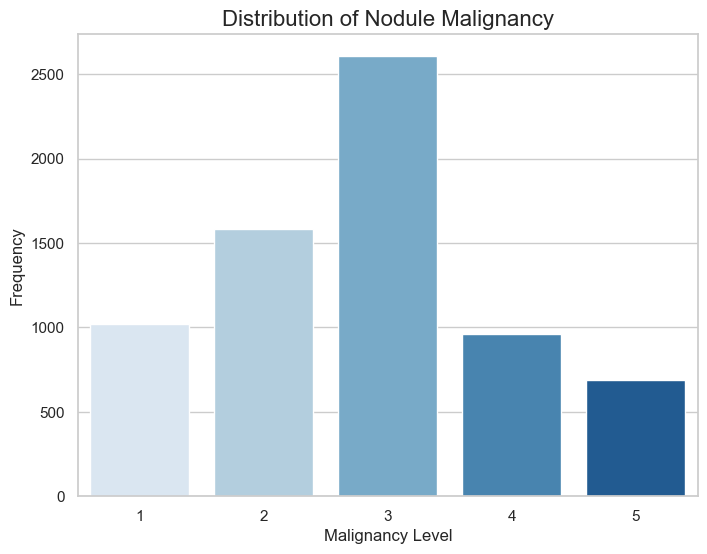

In [9]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot for the different malignancy categories (1-5)
plt.figure(figsize=(8, 6))
sns.countplot(x=malignidades, palette='Blues')

# Titles and labels
plt.title('Distribution of Nodule Malignancy', fontsize=16)
plt.xlabel('Malignancy Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()
